In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, special
from numpy import loadtxt

In [8]:
# calculate analytical solution

# set parameters
k_y_lambda = 0.1 # k_y * lambda_i
L_T_lambda = 10 # L_T / lambda_i 
k_z_lambda = np.logspace(-5, -1, 10000) # k_z * lambda_i
temp_ratio = 10

# calculate omega analytical
omega_analytical = (1/2 + 1j*np.sqrt(3)/2)*np.absolute(k_y_lambda**(1/3) * 
                                          L_T_lambda**(-1/3) * 
                                          temp_ratio**(1/3) * 
                                          (k_z_lambda)**(2/3))

In [3]:
# load data for the reference figure
analytical_data_imaginary = loadtxt('D:/MSc/OneDrive - University of York/MSc/project/Reference_Analytical_imaginary.csv', delimiter=',')
numerical_data_imaginary = loadtxt('D:/MSc/OneDrive - University of York/MSc/project/Reference_Numerical_imaginary.csv', delimiter=',')

analytical_data_real = loadtxt('D:/MSc/OneDrive - University of York/MSc/project/Reference_Analytical_real.csv', delimiter=',')
numerical_data_real = loadtxt('D:/MSc/OneDrive - University of York/MSc/project/Reference_Numerical_real.csv', delimiter=',')

In [4]:
# set lists for the data of the reference figure

# real part analytical
k_z_lambda_analytical_real = []
frequency_analytical_real = []

# real part numerical
k_z_lambda_numerical_real = []
frequency_numerical_real = []

# imaginary part analytical
k_z_lambda_analytical_imaginary = []
growth_rate_analytical = []

# imaginary part numerical
k_z_lambda_numerical_imaginary = []
growth_rate_numerical = []

# store the analytical real part
for i in range(len(analytical_data_real)):
    
    k_z_lambda_analytical_real.append(analytical_data_real[i][0])
    frequency_analytical_real.append(analytical_data_real[i][1])
    
# store the numerical real part 
for i in range(len(numerical_data_real)):
    
    k_z_lambda_numerical_real.append(numerical_data_real[i][0])
    frequency_numerical_real.append(numerical_data_real[i][1])

# store the analytical imaginary part 
for i in range(len(analytical_data_imaginary)): 
    
    k_z_lambda_analytical_imaginary.append(analytical_data_imaginary[i][0])
    growth_rate_analytical.append(analytical_data_imaginary[i][1])
    
# store the numerical imaginary part 
for i in range(len(numerical_data_imaginary)): 
    
    k_z_lambda_numerical_imaginary.append(numerical_data_imaginary[i][0])
    growth_rate_numerical.append(numerical_data_imaginary[i][1])

In [5]:
# first numerical (simple)

# define a function for the dispersion relation
def first_dispersion_relation(x, k_z_lambda):
    # x = omega/Omega_i (normalised complex frequency)
    
    # set the parameters
    k_y_lambda = 0.1 # k_y * lambda_i
    L_n_lambda = 10**5 # L_n/lambda_i
    L_T_lambda = 10 # L_T/lambda_i
    temp_ratio = 10 # T_e/T_i
    
    # normalised omega^T_i
    omega_t = k_y_lambda*L_T_lambda**(-1)
    # normalised omega^n_e
    omega_n = - k_y_lambda*temp_ratio*L_n_lambda**(-1)
    # normalised omega^2_s -- already squared here!!!
    omega_2s = temp_ratio*k_z_lambda**2 
    
    # return the expression for the dispersion relation
    return x**3 - x**2 *omega_n - (7/6)*x*omega_2s + omega_2s*omega_t + (1/15)*omega_2s*omega_n 

# calculate the first numerical solution

import numpy as np
from scipy import optimize

# define values for k_z * lambda_i
k_z_lambda = np.logspace(-5, -1, 10000)
# turn it to python list for the indexing in the loop
# it's easier compared to the numpy array

k_z_lambda_list = k_z_lambda.tolist() 

first_omega_numerical = [] # list to keep the root

# first loop for the first results
for i in k_z_lambda_list[:10]:
    # find the root
    solution = optimize.root_scalar(first_dispersion_relation, x0 = 0.0001+0.001j, 
                                     x1 = 0.001+0.002j, args=i, method='secant')
    # save the root
    first_omega_numerical.append(solution.root)
    
    #print(k_z_lambda_list.index(i))

# big loop that uses as guesses the previous roots
for i in k_z_lambda_list[10:]:
    
    # add some noise to the roots for the guesses
    guess_0 = first_omega_numerical[k_z_lambda_list.index(i)-1] - first_omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    guess_1 = first_omega_numerical[k_z_lambda_list.index(i)-1] + first_omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    # calculate root
    solution = optimize.root_scalar(first_dispersion_relation, x0 = guess_0, 
                                    x1 = guess_1, args=i, method='secant')
    # save root
    first_omega_numerical.append(solution.root)
    
first_omega_numerical = np.asarray(first_omega_numerical)

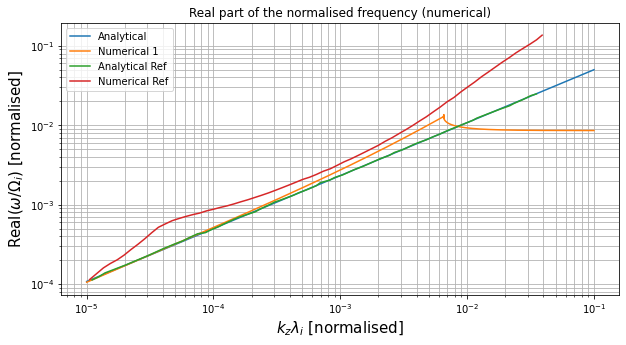

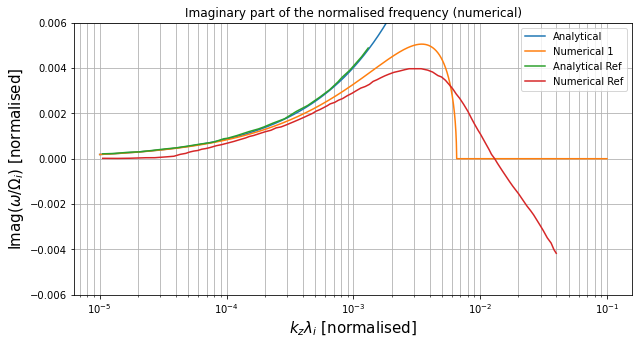

In [12]:
# plot analytical, first numerical, reference figure

# plot frequency
plt.subplots(figsize=(10,5))

# plot analytical
plt.plot(k_z_lambda_list, omega_analytical.real, label='Analytical')

# plot first numerical
plt.plot(k_z_lambda_list, first_omega_numerical.real, label='Numerical 1')

# plot reference
plt.plot(k_z_lambda_analytical_real, frequency_analytical_real, label='Analytical Ref')
plt.plot(k_z_lambda_numerical_real, frequency_numerical_real, label='Numerical Ref')

# fix the plot label's etc
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True, which="both", ls="-")

plt.show()

# plot growth rate
plt.subplots(figsize=(10,5))

# plot analytical
plt.plot(k_z_lambda, omega_analytical.imag, label='Analytical')

# plot first numerical
plt.plot(k_z_lambda_list, first_omega_numerical.imag, label='Numerical 1')

# plot reference
plt.plot(k_z_lambda_analytical_imaginary, growth_rate_analytical, label='Analytical Ref')
plt.plot(k_z_lambda_numerical_imaginary, growth_rate_numerical, label='Numerical Ref')

plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.ylim(-0.006, 0.006)
plt.show()

In [23]:
# define a function for the modified dispersion function
def dispersion_function(z):
    import numpy as np
    from scipy import special
    
    # calculate Z_{0, 0}(a)
    Zeta_00 = 1j*np.pi*special.wofz(z)
    # calculate Z_{1, 0}(a)
    Zeta_10 = z*Zeta_00 + special.gamma(1/2)
        
    # return the modified dispersion function
    return 1/(np.sqrt(np.pi))*Zeta_10

In [26]:
# define a function for the dispersion relation
def second_dispersion_relation(x, k_z_lambda):
    # x = omega/Omega_i (normalised complex frequency)
    
    # set the parameters
    k_y_lambda = 0.1 # k_y * lambda_i
    L_n_lambda = 10**5 # L_n/lambda_i
    L_T_lambda = 10 # L_T/lambda_i
    temp_ratio = 10 # T_e/T_i
    lambda_d = 10**2 # lambda_i/lambda_D
    bessel_0 = special.ive(0, k_y_lambda**2) # order 0 bessel function
    bessel_1 = special.ive(1, k_y_lambda**2) # order 1 bessel function
    
    z = x/k_z_lambda
    W = dispersion_function(z/np.sqrt(2.0)) # dispersion function 
    
    # normalised omega^T_i
    omega_t = k_y_lambda*L_T_lambda**(-1)
    # normalised omega^n_e
    omega_n = - k_y_lambda*temp_ratio*L_n_lambda**(-1)
    
    # return the expression for the dispersion relation
    return 2*x*(k_z_lambda**4 *lambda_d**(-2) + k_z_lambda**2 *k_y_lambda**2 *lambda_d**(-2)) + 2*x *temp_ratio**(-1)*k_z_lambda**2 + 2*x*k_z_lambda**2 + 2*x *k_z_lambda**2 *W*bessel_0 - 2*x*k_z_lambda**2 *bessel_0 - 2*temp_ratio**(-1) *k_z_lambda**2 *omega_n*W*bessel_0 + 2*temp_ratio**(-1)*k_z_lambda**2 *omega_n*bessel_0 + k_z_lambda**2 *omega_t *W*bessel_0 - k_z_lambda**2 *omega_t*bessel_0 - x**2 *omega_t*W*bessel_0 - 2*k_z_lambda**2 *omega_t*W*k_y_lambda**2 *bessel_1 + 2*k_z_lambda**2 *omega_t *k_y_lambda**2 *bessel_1 + 2*k_z_lambda**2 *omega_t*W*k_y_lambda**2 *bessel_0 - 2*k_z_lambda**2 *omega_t *k_y_lambda**2 *bessel_0

In [44]:
# calculate the second numerical solution
import numpy as np
import matplotlib.pyplot as plt
from scipy import special, optimize

# define values for k_z * lambda_i
k_z_lambda = np.logspace(-5, -1, 10000)
# turn it to python list for the indexing in the loop
# it's easier compared to the numpy array
k_z_lambda_list = k_z_lambda.tolist() 

second_omega_numerical = [] # list to keep the root

# first loop for the first results
for i in k_z_lambda_list[:100]:
    # find the root
    solution = optimize.root_scalar(second_dispersion_relation, x0 = 0.00009 + 0.00001j,
                            x1 = 0.0002 + 0.00002j, args=i, method='secant')
    # save the root
    second_omega_numerical.append(solution.root)
    
    #print(k_z_lambda_list.index(i))

# big loop that uses as guesses the previous roots
for i in k_z_lambda_list[100:]:
    
    # add some noise to the roots for the guesses
    guess_0 = second_omega_numerical[k_z_lambda_list.index(i)-1] + second_omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    guess_1 = second_omega_numerical[k_z_lambda_list.index(i)-1] - second_omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    # calculate root
    solution = optimize.root_scalar(second_dispersion_relation, x0 = guess_0,
                                    x1 = guess_1, args=i, method='secant')
    # save root
    second_omega_numerical.append(solution.root)
    

# turn it into a numpy array again
second_omega_numerical = np.asarray(second_omega_numerical)


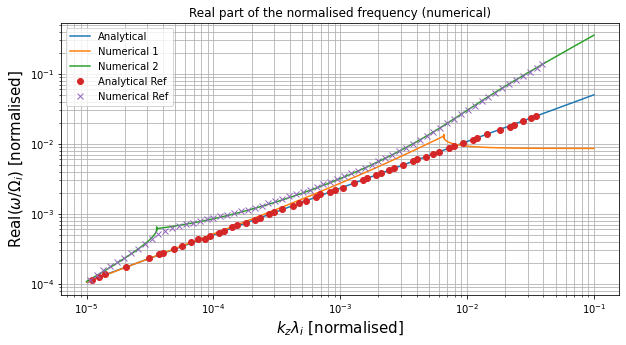

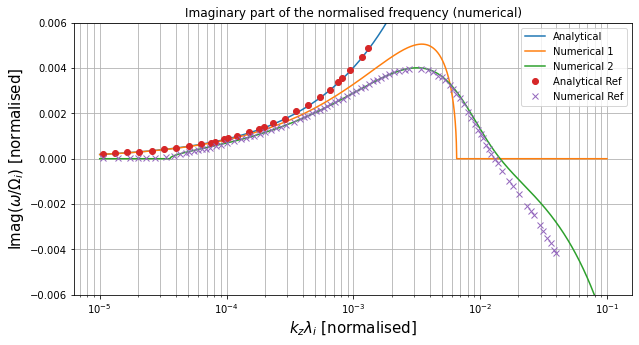

In [45]:
# plot analytical, first numerical, second numerical and reference figure

# plot frequency
plt.subplots(figsize=(10,5))

# plot analytical
plt.plot(k_z_lambda_list, omega_analytical.real, label='Analytical')

# plot first numerical
plt.plot(k_z_lambda_list, first_omega_numerical.real, label='Numerical 1')

# plot second numerical
plt.plot(k_z_lambda_list, second_omega_numerical.real, label='Numerical 2')

# plot reference
plt.plot(k_z_lambda_analytical_real, frequency_analytical_real, 'o', label='Analytical Ref')
plt.plot(k_z_lambda_numerical_real, frequency_numerical_real, 'x', label='Numerical Ref')

# fix the plot label's etc
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True, which="both", ls="-")

plt.show()

# plot growth rate
plt.subplots(figsize=(10,5))

# plot analytical
plt.plot(k_z_lambda, omega_analytical.imag, label='Analytical')

# plot first numerical
plt.plot(k_z_lambda_list, first_omega_numerical.imag, label='Numerical 1')

# plot second numerical
plt.plot(k_z_lambda_list, second_omega_numerical.imag, label='Numerical 2')

# plot reference
plt.plot(k_z_lambda_analytical_imaginary, growth_rate_analytical, 'o', label='Analytical Ref')
plt.plot(k_z_lambda_numerical_imaginary, growth_rate_numerical, 'x', label='Numerical Ref')

plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.ylim(-0.006, 0.006)
plt.show()